In [35]:
#Obtained Dataset from https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0

TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import keras
import os

# Building CNN Model here

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

# Preparing Data for input to the network

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Found 224 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Found 60 images belonging to 2 classes.


# Actual Training takes place here

## Run this only once and save the model after training

In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
6/6 [==============================] - 28s 5s/step - loss: 0.8213 - accuracy: 0.5677 - val_loss: 0.6806 - val_accuracy: 0.5167
Epoch 2/20
6/6 [==============================] - 25s 4s/step - loss: 0.5655 - accuracy: 0.7240 - val_loss: 0.4889 - val_accuracy: 0.9333
Epoch 3/20
6/6 [==============================] - 23s 4s/step - loss: 0.3725 - accuracy: 0.8385 - val_loss: 0.2207 - val_accuracy: 0.9667
Epoch 4/20
6/6 [==============================] - 23s 4s/step - loss: 0.3003 - accuracy: 0.8750 - val_loss: 0.3002 - val_accuracy: 0.9333
Epoch 5/20
6/6 [==============================] - 23s 4s/step - loss: 0.2071 - accuracy: 0.9375 - val_loss: 0.1492 - val_accuracy: 0.9667
Epoch 6/20
6/6 [==============================] - 23s 4s/step - loss: 0.2142 - accuracy: 0.9167 - val_loss: 0.1828 - val_accuracy: 0.9833
Epoch 7/20
6/6 [==============================] - 23s 4s/step - loss: 0.2089 - accuracy: 0.9479 

In [12]:
summary=hist.history
summary

{'loss': [0.82127445936203,
  0.5654894113540649,
  0.37252816557884216,
  0.30029550194740295,
  0.20707692205905914,
  0.21418233215808868,
  0.20890511572360992,
  0.17201144993305206,
  0.11595187336206436,
  0.10065259784460068,
  0.20576874911785126,
  0.12794308364391327,
  0.10841711610555649,
  0.1920943260192871,
  0.14088547229766846,
  0.10294776409864426,
  0.1058734655380249,
  0.12597030401229858,
  0.1705295443534851,
  0.14940278232097626],
 'accuracy': [0.5677083134651184,
  0.7239583134651184,
  0.8385416865348816,
  0.875,
  0.9375,
  0.9166666865348816,
  0.9479166865348816,
  0.9270833134651184,
  0.9583333134651184,
  0.9739583134651184,
  0.9427083134651184,
  0.9427083134651184,
  0.9739583134651184,
  0.9114583134651184,
  0.9479166865348816,
  0.9635416865348816,
  0.96875,
  0.9635416865348816,
  0.9427083134651184,
  0.9270833134651184],
 'val_loss': [0.6806002855300903,
  0.48885905742645264,
  0.2207493782043457,
  0.30019232630729675,
  0.149210229516029

In [13]:
model.save("covid19detector")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: covid19detector\assets


In [16]:
model = keras.models.load_model("covid19detector")

# Checking model performance

In [18]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 797ms/step - loss: 0.1247 - accuracy: 0.9333


[0.12474029511213303, 0.9333333373069763]

In [19]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [29]:
y_true, y_test = [],[]

In [30]:
for i in os.listdir("CovidDataset/Val/Normal/"):
    img=image.load_img("CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_true.append(1)

In [31]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_true.append(0)

In [32]:
y_true=np.array(y_true)
y_test=np.array(y_test)

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cn=confusion_matrix(y_true,y_test)

# 0 indicates positive cases

# 1 indicates negative ones

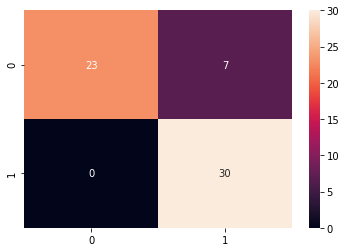

In [34]:
sns.heatmap(cn,annot=True) 